<a href="https://colab.research.google.com/github/srijita1406/Machine-Learning-Projects/blob/main/Using_PCA_on_a_regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Q. 1:

In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv('/content/V5.csv')

X=data.drop(['cltv'],axis=1)
y=data['cltv']

X.shape


(6257, 11)

### Q. 2:
How many total number of features (excluding target variable) are there in the dataset?

In [ ]:
X.shape


(6257, 11)

### Q. 3:
What are the unique values of feature `Types of Policy` in the dataset?


In [ ]:
X['type_of_policy'].value_counts()


Platinum    3329
Silver      1470
Gold        1458
Name: type_of_policy, dtype: int64

### Q. 4:
Which of the following columns have categorical data?

In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6257 entries, 0 to 6256
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              6257 non-null   int64  
 1   gender          6257 non-null   object 
 2   area            5869 non-null   object 
 3   qualification   6257 non-null   object 
 4   income          5881 non-null   float64
 5   marital_status  6257 non-null   int64  
 6   vintage         6257 non-null   int64  
 7   claim_amount    5871 non-null   float64
 8   num_policies    6257 non-null   object 
 9   policy          5864 non-null   object 
 10  type_of_policy  6257 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 537.8+ KB


### Q. 5:
Plot the `heatmap` and mark the pair which has the highest positive correlation value

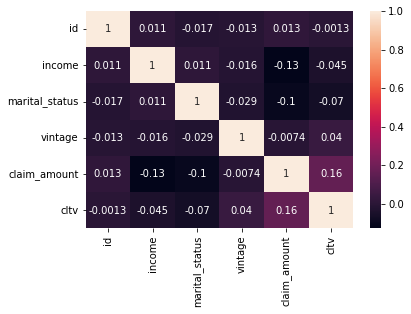

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True);

### Q. 6:

Which of the following features have `missing` values?



In [ ]:
X.isnull().sum()

id                  0
gender              0
area              388
qualification       0
income            376
marital_status      0
vintage             0
claim_amount      386
num_policies        0
policy            393
type_of_policy      0
dtype: int64

### Q. 7:
Break the dataset into features(`X`) and label (`y`), where the column `cltv` goes to `y` and the rest of the columns go to `X`. Enter the avg value of `cltv` column?

In [ ]:
# already divide data into X and y

print(y.mean())

99423.4329550903


### Q. 8:
Split the dataset into training and test dataset using `train_test_split` into `70:30` ratio while keeping random_state =42. What is the shape of the training set (X_train)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape

(4379, 11)

### Q. 9:
Drop(remove) `id` column from train and test data because not useful in model training. Now how many feature columns are remaining in training dataset?

In [ ]:
X_train=X_train.drop(['id'],axis=True)
X_test=X_test.drop(['id'],axis=True)

X_train.shape

(4379, 10)

### Q. 10:

Compute and write median of `income` column of X_train while ignoring the missing values. Replace all NaN values in income column of X_train and X_test by the median computed in X_train (upto two decimal).

In [ ]:
med=X_train['income'].median()
X_train['income']=X_train['income'].fillna(med)
X_test['income']=X_test['income'].fillna(med)
print(med)

6.89


### Q. 11:
Which is the most frequent value in `policy` column of X_train? Replace all NaN value in `policy` column of X_train and X_test by most frequent value in X_train

In [ ]:
most_frequent_policy = X_train['policy'].value_counts().idxmax()
X_train['policy'] = X_train['policy'].fillna(most_frequent_policy)
X_test['policy'] = X_test['policy'].fillna(most_frequent_policy)
print(most_frequent_policy)

A


### Q. 12:
Which is the most frequent value in `area` column of X_train? Replace all NaN value in `area` column of X_train and X_test by most frequent value X_train

In [ ]:
most_frequent_area = X_train['area'].value_counts().idxmax()
X_train['area'] = X_train['area'].fillna(most_frequent_area)
X_test['area'] = X_test['area'].fillna(most_frequent_area)
print(most_frequent_area)

Urban


### Q. 13:
Replace all NaN value in claim_amount column of X_train and X_test by 0 (Zero). After Replacing NAN values from claim_amount column what is the standard deviation of claim_amount column in X_train. (correct upto two decimal places)



In [ ]:
X_train['claim_amount'] = X_train['claim_amount'].fillna(0)
X_test['claim_amount'] = X_test['claim_amount'].fillna(0)
std_claim_amount = X_train['claim_amount'].std()
print(std_claim_amount)

3330.754550847971


### Q. 14:
Apply `MinMaxScaler` on `income` column of X_train. Compute and write median of `income` column? (correct Upto 2 decimal)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
new_X_train=X_train
scaler = MinMaxScaler()
new_X_train['income'] = scaler.fit_transform(new_X_train[['income']])
median_income = new_X_train['income'].median()
print(median_income)

0.06887576333967364


### Q. 15:
Apply preprocessing on features of X_train and X_test dataset.


How many features will you get after preprocessing?

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

cat_cols = ['gender', 'area', 'qualification', 'marital_status', 'num_policies', 'policy', 'type_of_policy']
num_cols = ['income', 'vintage', 'claim_amount']

cat_transformer = OneHotEncoder(categories='auto', sparse=False)
num_transformer = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_cols),
        ('num', num_transformer, num_cols)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(X_train.shape)
print(X_test.shape)


(4379, 20)
(1878, 20)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Q. 16:
Apply `SequentialFeatureSelector` transformer with direction= 'forward' with `LinearRegression()` estimator and select 5 features by fitting to the X_train and y_train. 

* Use cv = KFold(n_splits=5,random_state=42,shuffle=True) in SequentialFeatureSelector.

 Which of the following options represents the correct integer index of the selected features list?

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward', cv=KFold(n_splits=5, random_state=42, shuffle=True))
sfs.fit(X_train, y_train)

selected_features = list(sfs.get_support())
print(selected_features)

[False, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, True]


### Q. 17:
Apply `LinearRegression` on the trainig set(`X_train` and `y_train`). What is the `R2 score` on the test set(`X_test` and `y_test`).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(r2_score(y_test, y_pred))

-5.768186105129634


### Q. 18:
Using the `LinearRegression` model, compute the `cross-validation scores` for `5 splits` on training data (X_train and y_train) using `cross_val_score`.Enter the maximum value of `𝑅2 score`

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, X_train, y_train, cv=5)

print(cv_scores.mean())

0.1323021431962767


### Q. 19:

Apply Ridge regression with random_state=42 with default penalty value on training set(X_train and y_train) and calculate the 𝑅2 score on test_set (X_test and y_test). What is the correct score

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge = Ridge(random_state=42)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)


-6.692927197965289


### Q. 20:
Apply `Lasso regression` with random_state=42 and regularization rate=0.1 on the training data(X_train & y_train). Enter the value of the `intercept` you got correctly upto 2 digits after decimal points

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)

intercept = lasso.intercept_
print(intercept)


107300.60205407698


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.284e+12, tolerance: 3.600e+09
  model = cd_fast.enet_coordinate_descent(


### Q. 21:

Fit `SGDRegressor(random_state=42)` estimator on the training data(X_train & y_train) and predict labels for test_data(X_test), lets call it as `y_test_predict`. The parameters are initialized with default values. Calculate and mark the correct `mean_absolute_error` value between `y_test` and `y_test_predict` from the given options. (Correct upto two decimals)

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error

sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)

y_test_predict = sgd.predict(X_test)
mae = mean_absolute_error(y_test, y_test_predict)

print(mae)


139557.27740974707


### Q. 22:

Using `SGDRegressor(random_state=42)` as an estimator for exactly 10 iterations.

Write the correct R2 score on test data 


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

sgd = SGDRegressor(random_state=42, max_iter=10)
sgd.fit(X_train, y_train)

y_test_predict = sgd.predict(X_test)
r2 = r2_score(y_test, y_test_predict)

print(r2)

-4.515765444440852


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### Q. 23:
Mark the best `alpha` value you got using above instructions.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('lasso', Lasso())
])

param_grid = {
    'poly__degree': [1, 2],
    'lasso__alpha': np.logspace(-3, 0, num=5)
}

grid = GridSearchCV(pipe, param_grid=param_grid, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)
print("Best alpha value:", grid.best_params_['lasso__alpha'])

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.041e+12, tolerance: 2.954e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+12, tolerance: 2.884e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+12, tolerance: 2.829e+09

Best alpha value: 1.0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.449e+12, tolerance: 2.882e+09
  model = cd_fast.enet_coordinate_descent(


### Q. 24:

Enter the best polynomial degree value you got using above instructions.

In [ ]:
print("Best polynomial degree value:", grid.best_params_['poly__degree'])

Best polynomial degree value: 1


### Q. 25:

What is the sum of `explained_variance_ratio_` ?

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=5, svd_solver='full', whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)

sum_var_ratio = np.sum(pca.explained_variance_ratio_)
print(sum_var_ratio)


0.6602820959751092


### Q. 26:
Use PCA transformed training data from earlier question and y_train to fit the `RidgeCV` estimator model having alpha value as [0.001,0.01,0.1,1]. Calculate the R2 score you got from the model for transformed test data(PCA transformed X_test).

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

pca = PCA(n_components=5, svd_solver='full', whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

ridge_cv = RidgeCV(alphas=[0.001, 0.01, 0.1, 1], cv=5)
ridge_cv.fit(X_train_pca, y_train)

y_test_pred = ridge_cv.predict(X_test_pca)
r2 = r2_score(y_test, y_test_pred)
print(r2)


0.05511802928475107
